In [146]:
# install matplotlib_venn
#import sys
#!{sys.executable} -m pip install matplotlib_venn

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sb
import geopandas as gpd


sb.set_theme()

%store -r final_data
%store -r hierar_countries
%store -r kmeans_countries

hierar_df = hierar_countries.copy()
kmeans_df = kmeans_countries.copy()

In [148]:
# Hierar_countries
print("Hierar countries: ")
print(hierar_df['country'])

Hierar countries: 
4                                Angola
18                                Benin
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
45     Democratic Republic of the Congo
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
68                               Guinea
70                                Haiti
85                                Kenya
89     Lao People's Democratic Republic
93                              Liberia
98                           Madagascar
99                               Malawi
102                                Mali
113                          Mozambique
114                             Myanmar
117                               Nepal
121                               Niger
128                  

In [149]:
# Hierar_countries
print("Kmeans countries: ")
print(kmeans_df['country'])

Kmeans countries: 
0                           Afghanistan
4                                Angola
18                                Benin
20     Bolivia (Plurinational State of)
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
61                               Gambia
64                                Ghana
68                               Guinea
70                                Haiti
85                                Kenya
86                             Kiribati
89     Lao People's Democratic Republic
92                   

In [150]:
union = pd.Series(np.union1d(kmeans_df['country'], hierar_df['country']))
intersection = pd.Series(np.intersect1d(kmeans_df['country'], hierar_df['country']))
s1 = np.setdiff1d(kmeans_df['country'],intersection)
s2 = np.setdiff1d(hierar_df['country'],intersection)

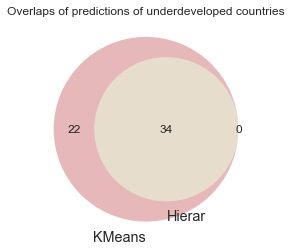

In [151]:
plt.title("Overlaps of predictions of underdeveloped countries")
venn2(subsets = (s1.size,s2.size,intersection.size), set_labels = ('KMeans', 'Hierar'))

In [152]:
# compare the 22 countries not clustered with the 34 countries clustered by hierar
final_data_cp_56 = final_data[final_data["country"].isin(kmeans_df['country'])]
final_data_cp_56['model'] = np.where(final_data_cp_56['country'].isin(s1), 'KMeans', 'KMeans+Hierar')

final_data_cp_56

/var/folders/0p/yd85kh_549sdbhyx7bbm11r40000gn/T/ipykernel_17188/147813773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_cp_56['model'] = np.where(final_data_cp_56['country'].isin(s1), 'KMeans', 'KMeans+Hierar')


,GDP per capita (current US$),Economy: Agriculture (% of GVA),Agricultural production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),country,Region,Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol,Health expenditure per capita,model
0,623.2,23.3,125,1458.0,3568.0,3.2,26.7,68.6,61.6,5,Afghanistan,SouthernAsia,51.450,62.25,62.60,111.350,51.1024,KMeans
5,4714.1,6.8,175,21011.0,8790.0,3.5,44.1,65.4,60.8,25,Angola,MiddleAfrica,68.450,60.20,51.80,128.650,155.5653,KMeans+Hierar
21,779.1,23.2,152,410.0,2630.0,2.8,44.0,67.7,85.6,17,Benin,WesternAfrica,71.700,59.95,78.65,128.950,35.8386,KMeans+Hierar
24,3076.8,12.6,142,6969.0,8374.0,1.6,68.5,42.9,92.2,32,Bolivia (Plurinational State of),SouthAmerica,73.350,67.75,86.15,97.100,193.8384,KMeans
32,611.1,34.5,131,2019.0,3699.0,3.0,29.9,64.8,80.6,9,Burkina Faso,WesternAfrica,83.500,58.65,86.65,88.000,30.555,KMeans+Hierar
33,244.6,36.3,109,123.0,625.0,3.0,12.1,77.8,46.2,6,Burundi,EasternAfrica,83.650,56.10,82.45,123.800,18.345,KMeans+Hierar
35,1158.7,28.2,175,13204.0,15313.0,1.6,20.7,29.9,133.0,17,Cambodia,South-easternAsia,81.300,67.55,84.55,116.650,66.0459,KMeans+Hierar
36,1217.3,22.7,155,2130.0,4899.0,2.7,54.4,67.5,71.8,14,Cameroon,MiddleAfrica,76.150,56.40,73.75,117.100,49.9093,KMeans+Hierar
39,333.2,34.9,114,213.0,147.0,0.4,40.0,93.5,20.4,5,Central African Republic,MiddleAfrica,78.250,49.40,72.00,93.550,13.9944,KMeans+Hierar
40,713.0,25.4,146,1990.0,1371.0,3.3,22.5,91.2,40.2,6,Chad,MiddleAfrica,71.650,51.65,58.30,101.300,25.668,KMeans+Hierar


In [153]:
final_data_cp_56['model'] = final_data_cp_56['model'].astype('category')
final_data_cp_56.dtypes

/var/folders/0p/yd85kh_549sdbhyx7bbm11r40000gn/T/ipykernel_17188/2559332232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_cp_56['model'] = final_data_cp_56['model'].astype('category')


GDP per capita (current US$)                            Float64
Economy: Agriculture (% of GVA)                         float64
Agricultural production index (2004-2006=100)             Int64
International trade: Exports (million US$)              float64
International trade: Imports (million US$)              float64
Population growth rate (average annual %)               float64
Urban population (% of total population)                Float64
Infant mortality rate (per 1000 live births             float64
Mobile-cellular subscriptions (per 100 inhabitants)     float64
Energy supply per capita (Gigajoules)                     Int64
country                                                  string
Region                                                   string
Average labour force participation                      float64
Average life expectancy                                 float64
Average pop. using improved drinking water              float64
Average Education: Primary gross enrol  

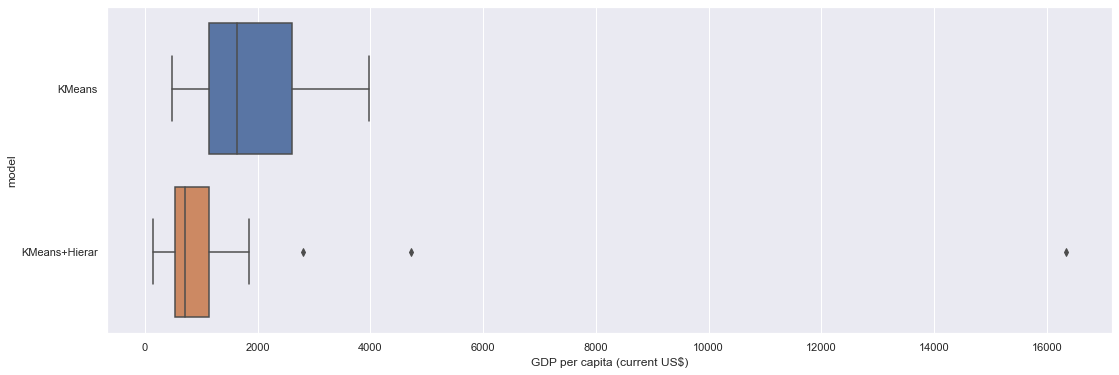

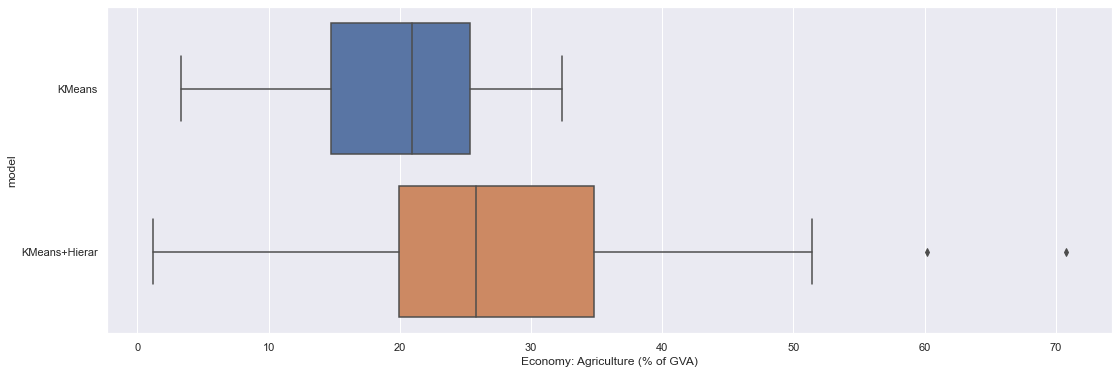

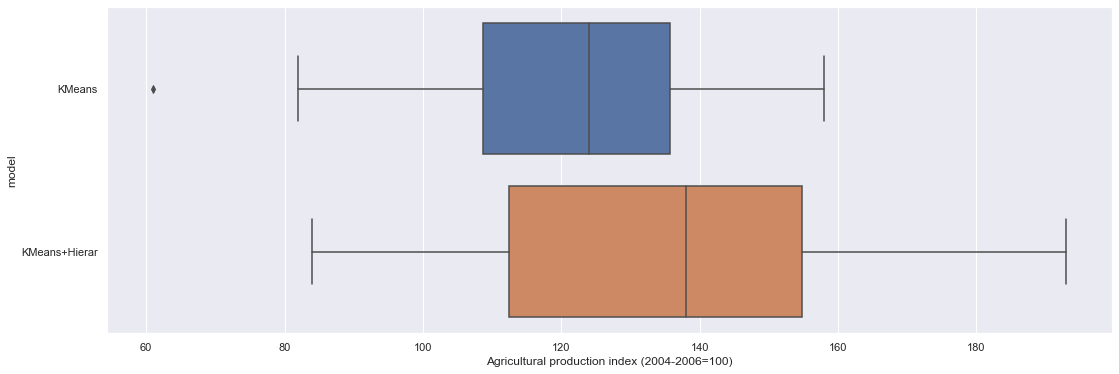

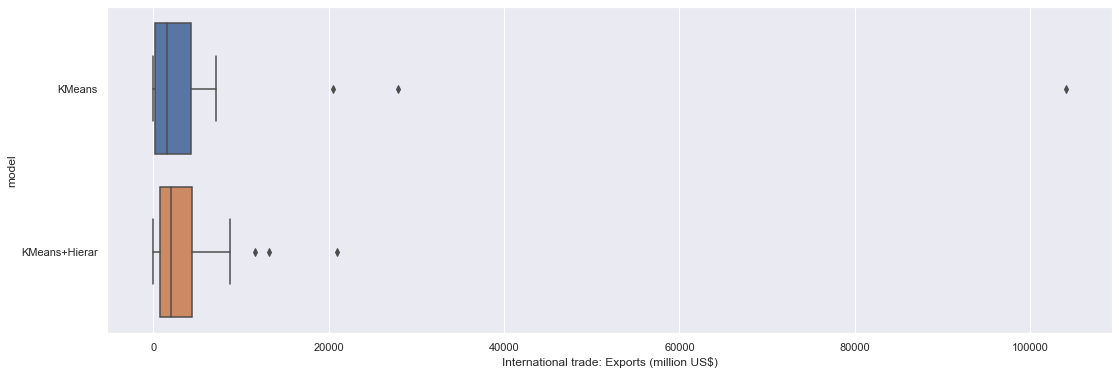

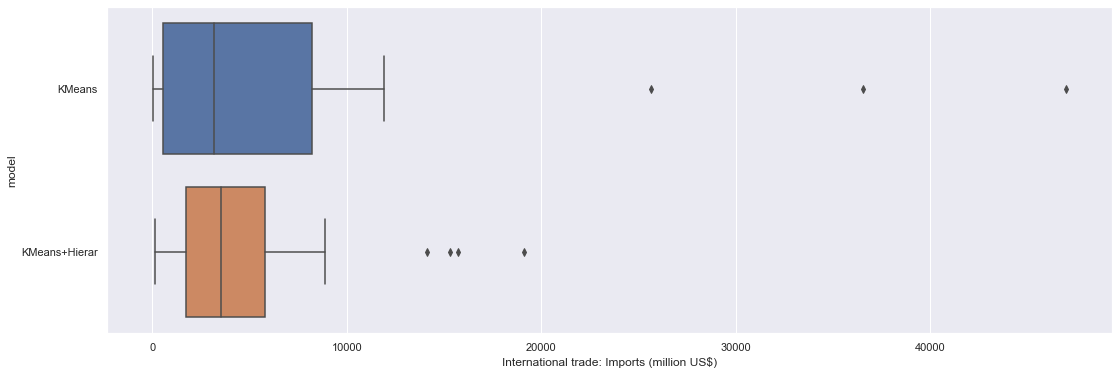

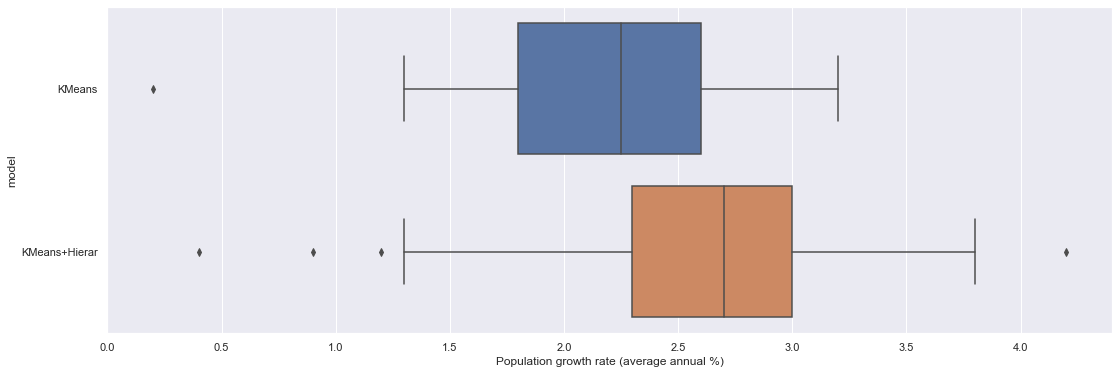

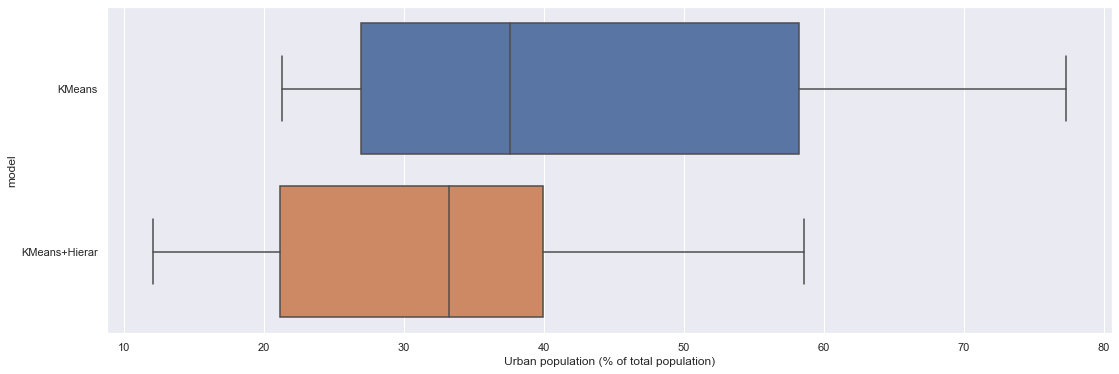

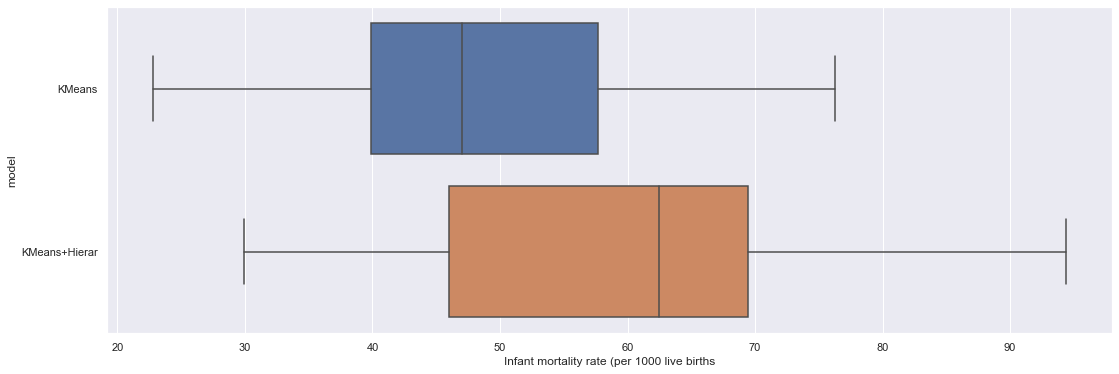

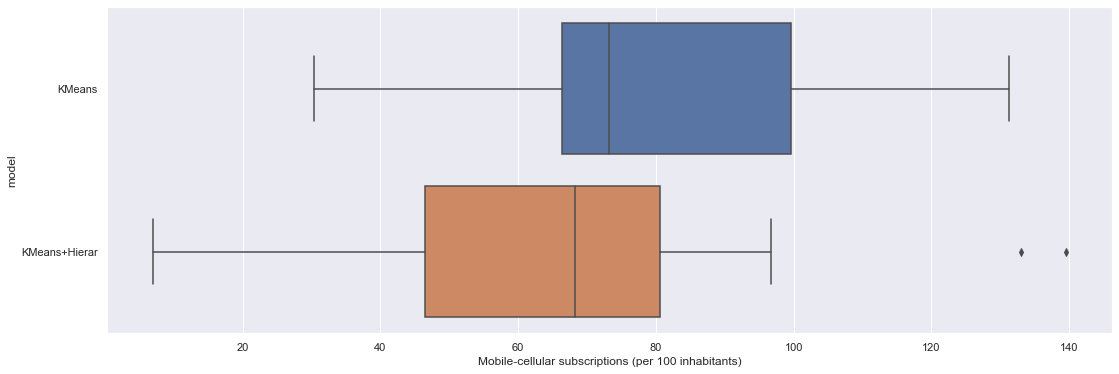

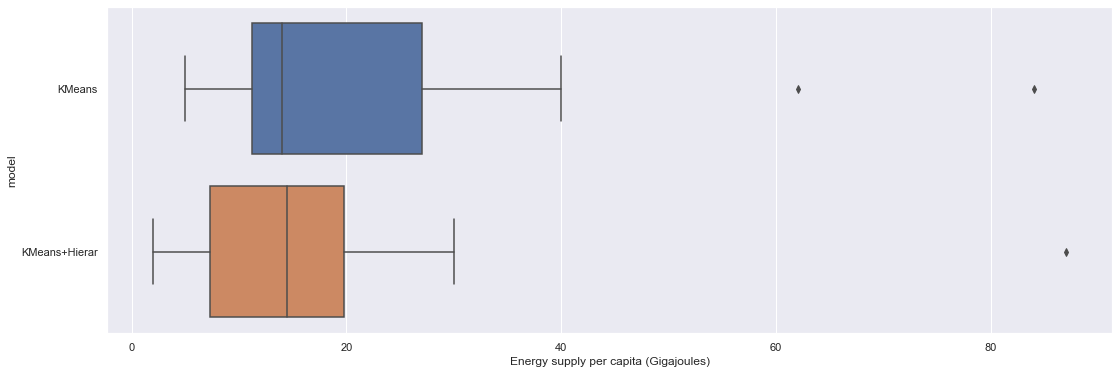

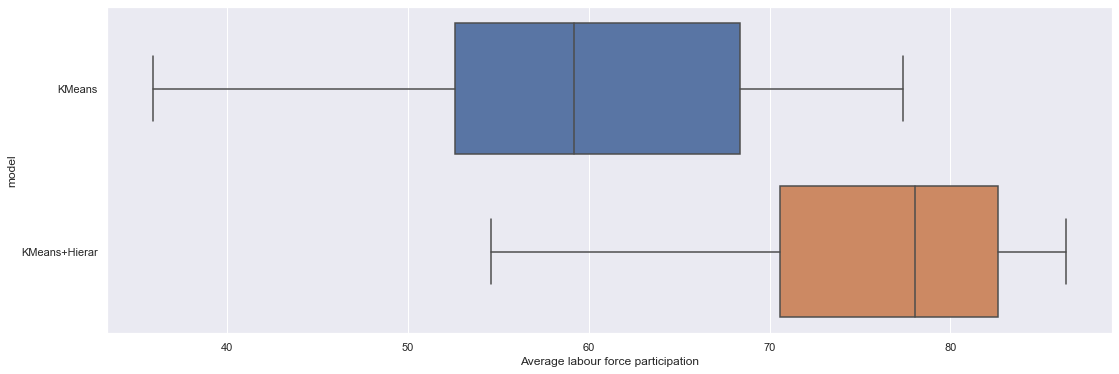

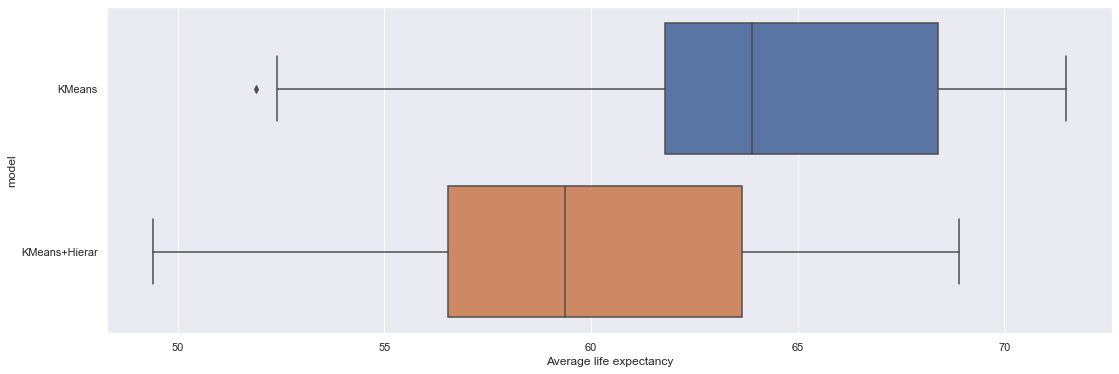

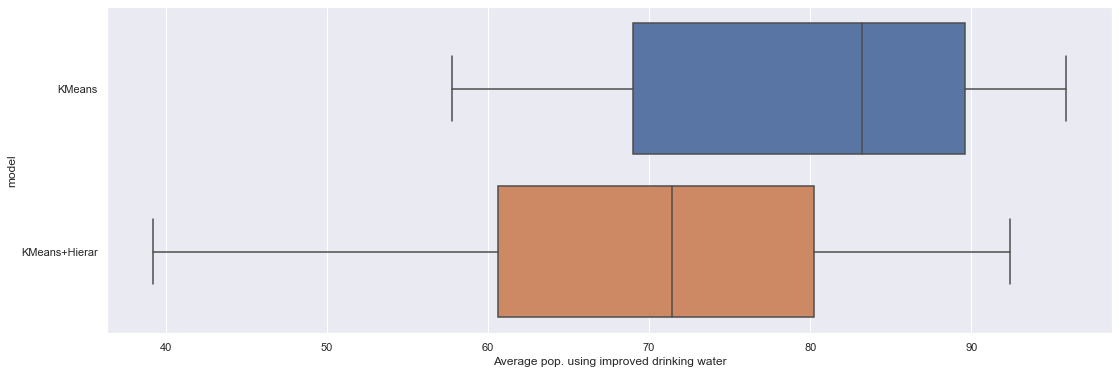

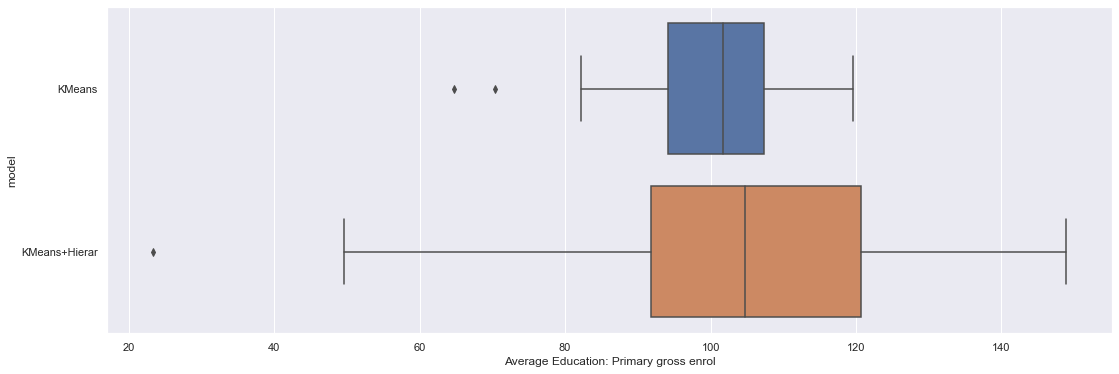

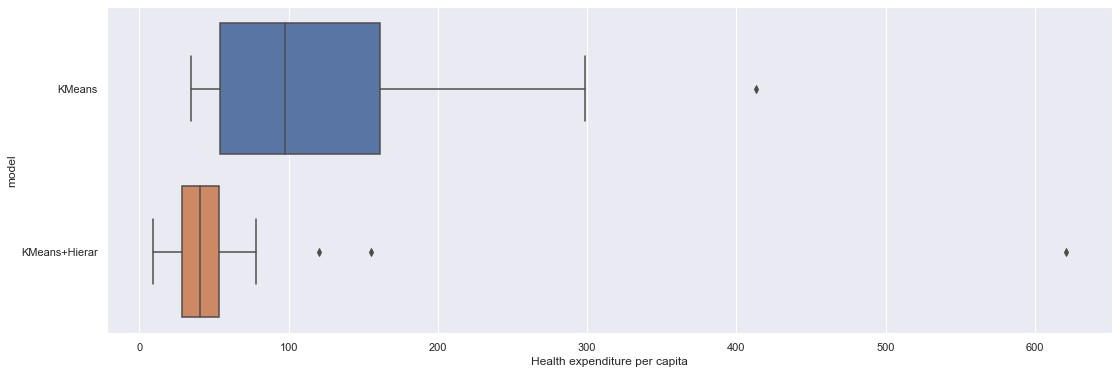

In [154]:
for col in final_data_cp_56:
    if col == "country" or col == "Region" or col == "model":
        continue
    f = plt.figure(figsize=(18, 6))
    #sb.swarmplot(x=col, y="model", data=final_data_cp_56)
    sb.boxplot(x=col, y="model", data=final_data_cp_56, orient = "h")

From the boxplot comparison above, focusing on the variables of GDP per capital, Economy:Agriculture (% of GVA), Population growth rate, Urban population proportion, Infant mortality rate, Mobile cellular subscriptions, Energy supply, Average life expectancy, Ave population using improved drinking water and Health expenditure per capita, we can conclude that the countries in the intersection of the KMeans and Hierarchical models (34) are worse off than those in KMeans only (22). 

In [155]:
# select the hierarchical countries
hierar_df['country']

4                                Angola
18                                Benin
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
45     Democratic Republic of the Congo
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
68                               Guinea
70                                Haiti
85                                Kenya
89     Lao People's Democratic Republic
93                              Liberia
98                           Madagascar
99                               Malawi
102                                Mali
113                          Mozambique
114                             Myanmar
117                               Nepal
121                               Niger
128                    Papua New Guinea


In [156]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
hierar_df.to_csv('hierar_df.csv') # export csv file to add country codes

In [157]:
# import hierar_df with iso codes from data folder
df_with_codes = pd.read_csv('./data/hierar_df.csv')
df_with_codes.head()

,GDP per capita (current US$),Economy: Agriculture (% of GVA),Agricultural production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),country,Region,Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol,Health expenditure per capita,cluster,iso_a3
4,4714.1,6.8,175,21011,8790,3.5,44.1,65.4,60.8,25,Angola,MiddleAfrica,68.45,60.20,51.80,128.65,155.5653,1,AGO
18,779.1,23.2,152,410,2630,2.8,44.0,67.7,85.6,17,Benin,WesternAfrica,71.70,59.95,78.65,128.95,35.8386,1,BEN
26,611.1,34.5,131,2019,3699,3.0,29.9,64.8,80.6,9,Burkina Faso,WesternAfrica,83.50,58.65,86.65,88.00,30.5550,1,BFA
27,244.6,36.3,109,123,625,3.0,12.1,77.8,46.2,6,Burundi,EasternAfrica,83.65,56.10,82.45,123.80,18.3450,1,BDI
29,1158.7,28.2,175,13204,15313,1.6,20.7,29.9,133.0,17,Cambodia,South-easternAsia,81.30,67.55,84.55,116.65,66.0459,1,KHM


In [158]:
worldmap
# # Creating axes and plotting world map
# fig, ax = plt.subplots(figsize=(12, 6))
# worldmap.plot(color="lightgrey", ax=ax)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
